In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('customerchurn.csv')

# Display the first few rows of the dataset to understand its structure
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [9]:
# Count the total number of male customers
male_customers = df[df['gender'] == 'Male'].shape[0]
print(f"Total number of male customers: {male_customers}")


Total number of male customers: 3555


In [10]:
# Count the total number of customers with Internet Service as 'DSL'
dsl_customers = df[df['InternetService'] == 'DSL'].shape[0]
print(f"Total number of customers with Internet Service as 'DSL': {dsl_customers}")


Total number of customers with Internet Service as 'DSL': 2421


In [12]:
# Extract female senior citizens whose Payment Method is 'Mailed check'
new_customer = df[(df['gender'] == 'Female') & 
                   (df['SeniorCitizen'] == 1) & 
                   (df['PaymentMethod'] == 'Mailed check')]

print(f"Extracted {new_customer.shape[0]} customers")


Extracted 50 customers


In [16]:
# Extract customers based on tenure and total charges
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
new_customer = df[(df['tenure'] < 10) | (df['TotalCharges'] < 500)]

print(f"Extracted {new_customer.shape[0]} customers")


Extracted 2233 customers


# Data Visualization

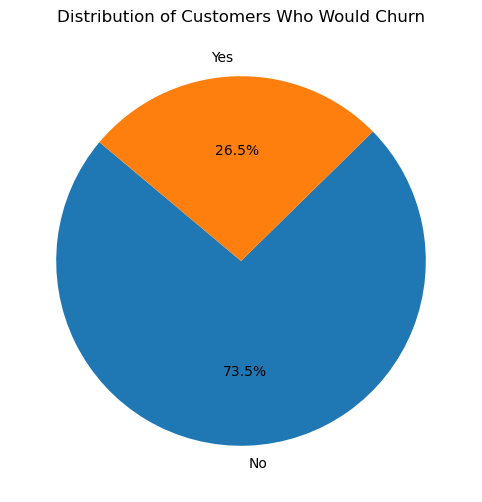

In [17]:
import matplotlib.pyplot as plt

# Count the number of churned and non-churned customers
churn_counts = df['Churn'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customers Who Would Churn')
plt.show()


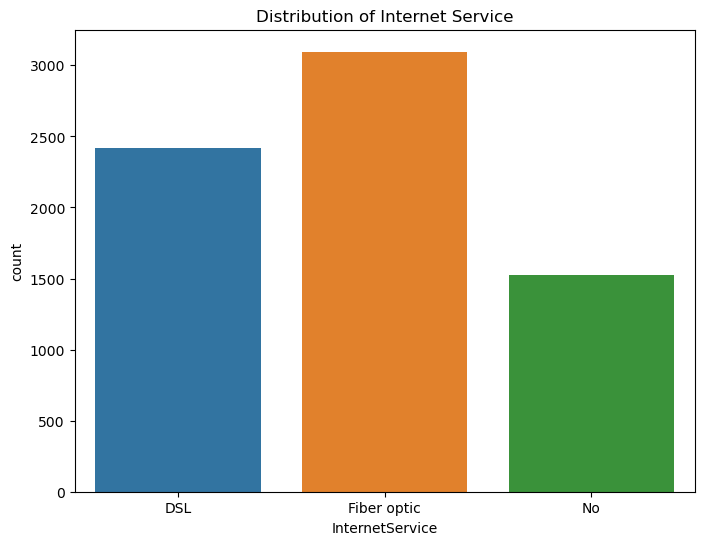

In [18]:
import seaborn as sns

# Plot bar chart
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='InternetService')
plt.title('Distribution of Internet Service')
plt.show()


# 3. Model Building

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming df is your DataFrame and is already loaded and preprocessed
# Feature and target
X = df[['tenure']].values  # Feature
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)    # Target

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = Sequential([
    Dense(12, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 12 nodes
    Dense(8, activation='relu'),  # Hidden layer with 8 nodes
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=150, validation_split=0.2)



Epoch 1/150


C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6188 - loss: 0.6681 - val_accuracy: 0.7507 - val_loss: 0.5474
Epoch 2/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7285 - loss: 0.5488 - val_accuracy: 0.7507 - val_loss: 0.5080
Epoch 3/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7503 - loss: 0.5137 - val_accuracy: 0.7507 - val_loss: 0.5049
Epoch 4/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7410 - loss: 0.5205 - val_accuracy: 0.7507 - val_loss: 0.5016
Epoch 5/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7260 - loss: 0.5276 - val_accuracy: 0.7507 - val_loss: 0.4986
Epoch 6/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7210 - loss: 0.5263 - val_accuracy: 0.7507 - val_loss: 0.4968
Epoch 7/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7352 - loss: 0.5111 - val_accuracy: 0.7507 - val_loss: 0.4959
Epoch 8/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7399 - loss: 0.5164 - val_accuracy: 0.7507

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7475 - loss: 0.5153 - val_accuracy: 0.7595 - val_loss: 0.4918
Epoch 52/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7618 - loss: 0.5028 - val_accuracy: 0.7595 - val_loss: 0.4925
Epoch 53/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7581 - loss: 0.5147 - val_accuracy: 0.7649 - val_loss: 0.4918
Epoch 54/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7473 - loss: 0.5173 - val_accuracy: 0.7587 - val_loss: 0.4918
Epoch 55/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7568 - loss: 0.5023 - val_accuracy: 0.7587 - val_loss: 0.4937
Epoch 56/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7543 - loss: 0.5105 - val_accuracy: 0.7587 - val_loss: 0.4920
Epoch 57/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7433 - loss: 0.5172 - val_accuracy: 0.7587 - val_loss: 0.4928
Epoch 58/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7457 - loss: 0.5212 - val_accuracy:

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7545 - loss: 0.5058 - val_accuracy: 0.7649 - val_loss: 0.4923
Epoch 102/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7537 - loss: 0.5185 - val_accuracy: 0.7595 - val_loss: 0.4916
Epoch 103/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7631 - loss: 0.4967 - val_accuracy: 0.7587 - val_loss: 0.4925
Epoch 104/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7400 - loss: 0.5232 - val_accuracy: 0.7595 - val_loss: 0.4916
Epoch 105/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7620 - loss: 0.5052 - val_accuracy: 0.7595 - val_loss: 0.4919
Epoch 106/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7475 - loss: 0.5249 - val_accuracy: 0.7595 - val_loss: 0.4919
Epoch 107/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7536 - loss: 0.5110 - val_accuracy: 0.7587 - val_loss: 0.4938
Epoch 108/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7603 - loss: 0.5076 - val_ac

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7433 - loss: 0.5205 - val_accuracy: 0.7587 - val_loss: 0.4932


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Confusion Matrix:
[[914 122]
 [225 148]]
Accuracy: 0.75


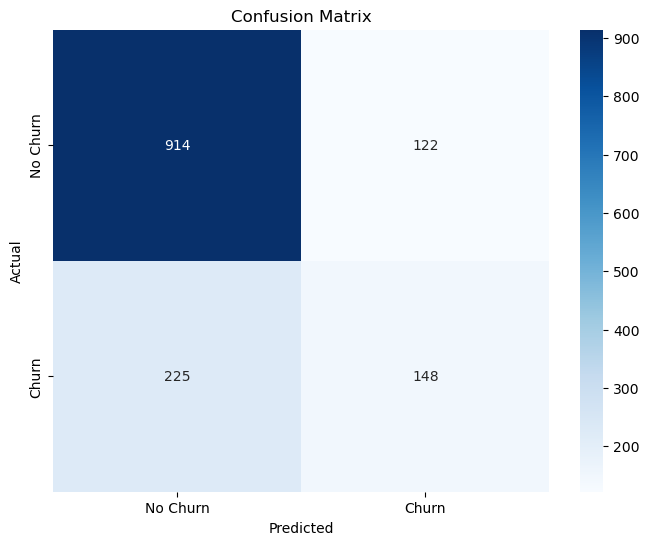

In [28]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary class output

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
accuracy = accuracy_score(y_test, y_pred_classes)

print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.2f}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/150


C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4766 - loss: 0.7171 - val_accuracy: 0.7507 - val_loss: 0.6449
Epoch 2/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7262 - loss: 0.6352 - val_accuracy: 0.7507 - val_loss: 0.5553
Epoch 3/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7231 - loss: 0.5714 - val_accuracy: 0.7507 - val_loss: 0.5082
Epoch 4/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7290 - loss: 0.5515 - val_accuracy: 0.7507 - val_loss: 0.4998
Epoch 5/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7352 - loss: 0.5335 - val_accuracy: 0.7507 - val_loss: 0.4988
Epoch 6/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7324 - loss: 0.5379 - val_accuracy: 0.7507 - val_loss: 0.4973
Epoch 7/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7271 - loss: 0.5433 - val_accuracy: 0.7507 - val_loss: 0.4962
Epoch 8/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7315 - loss: 0.5365 - val_accuracy: 0.7507

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7383 - loss: 0.5270 - val_accuracy: 0.7649 - val_loss: 0.4940
Epoch 52/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7440 - loss: 0.5209 - val_accuracy: 0.7507 - val_loss: 0.4948
Epoch 53/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7376 - loss: 0.5306 - val_accuracy: 0.7507 - val_loss: 0.4957
Epoch 54/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7370 - loss: 0.5272 - val_accuracy: 0.7471 - val_loss: 0.4951
Epoch 55/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7271 - loss: 0.5331 - val_accuracy: 0.7507 - val_loss: 0.4956
Epoch 56/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7378 - loss: 0.5308 - val_accuracy: 0.7507 - val_loss: 0.4958
Epoch 57/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7393 - loss: 0.5244 - val_accuracy: 0.7471 - val_loss: 0.4955
Epoch 58/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7480 - loss: 0.5177 - val_accuracy:

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7361 - loss: 0.5308 - val_accuracy: 0.7507 - val_loss: 0.4945
Epoch 102/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7390 - loss: 0.5227 - val_accuracy: 0.7507 - val_loss: 0.4947
Epoch 103/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7526 - loss: 0.5172 - val_accuracy: 0.7569 - val_loss: 0.4935
Epoch 104/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7400 - loss: 0.5300 - val_accuracy: 0.7471 - val_loss: 0.4940
Epoch 105/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7574 - loss: 0.5183 - val_accuracy: 0.7507 - val_loss: 0.4945
Epoch 106/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7360 - loss: 0.5241 - val_accuracy: 0.7569 - val_loss: 0.4939
Epoch 107/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7448 - loss: 0.5198 - val_accuracy: 0.7507 - val_loss: 0.4961
Epoch 108/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7464 - loss: 0.5165 - val_ac

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7491 - loss: 0.5132 - val_accuracy: 0.7471 - val_loss: 0.4944
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7248 - loss: 0.5104
Model 2 - Accuracy: 0.7345635294914246
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


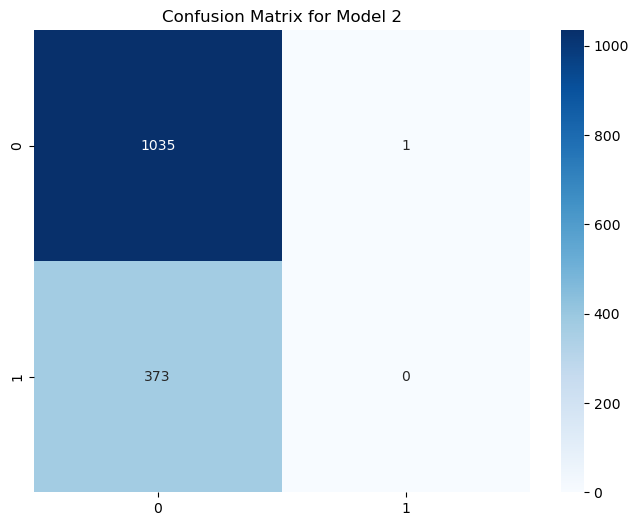

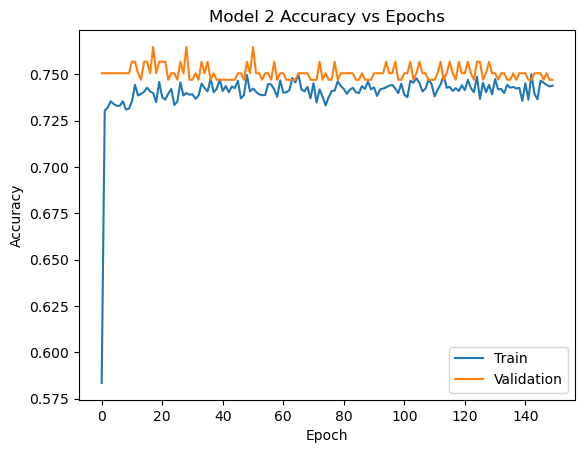

In [29]:
from tensorflow.keras.layers import Dropout

# Build the model
model2 = Sequential([
    Dense(12, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history2 = model2.fit(X_train, y_train, epochs=150, validation_split=0.2, verbose=1)

# Evaluate the model
loss2, accuracy2 = model2.evaluate(X_test, y_test)
print(f"Model 2 - Accuracy: {accuracy2}")

# Predict and build confusion matrix
y_pred2 = (model2.predict(X_test) > 0.5).astype("int32")
conf_matrix2 = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Model 2')
plt.show()

# Plot Accuracy vs Epochs
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model 2 Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()


Epoch 1/150


C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6664 - loss: 0.6720 - val_accuracy: 0.7556 - val_loss: 0.6196
Epoch 2/150
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7272 - loss: 0.6175 - val_accuracy: 0.7556 - val_loss: 0.5733
Epoch 3/150
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7180 - loss: 0.5970 - val_accuracy: 0.7556 - val_loss: 0.5598
Epoch 4/150
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7339 - loss: 0.5800 - val_accuracy: 0.7556 - val_loss: 0.5579
Epoch 5/150
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7318 - loss: 0.5815 - val_accuracy: 0.7556 - val_loss: 0.5579
Epoch 6/150
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7289 - loss: 0.5844 - val_accuracy: 0.7556 - val_loss: 0.5575
Epoch 7/150
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7440 - loss: 0.5693 - val_accuracy: 0.7556 - val_loss: 0.5579
Epoch 8/150
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7340 - loss: 0.5794 - val_accuracy: 0.7556

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7484 - loss: 0.5647 - val_accuracy: 0.7556 - val_loss: 0.5581
Epoch 52/150
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7372 - loss: 0.5762 - val_accuracy: 0.7556 - val_loss: 0.5578
Epoch 53/150
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7326 - loss: 0.5807 - val_accuracy: 0.7556 - val_loss: 0.5576
Epoch 54/150
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7298 - loss: 0.5835 - val_accuracy: 0.7556 - val_loss: 0.5574
Epoch 55/150
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7345 - loss: 0.5788 - val_accuracy: 0.7556 - val_loss: 0.5575
Epoch 56/150
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7390 - loss: 0.5744 - val_accuracy: 0.7556 - val_loss: 0.5575
Epoch 57/150
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7233 - loss: 0.5901 - val_accuracy: 0.7556 - val_loss: 0.5574
Epoch 58/150
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7317 - loss: 0.5817 - val_accuracy:

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7306 - loss: 0.5828 - val_accuracy: 0.7556 - val_loss: 0.5575
Epoch 102/150
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7315 - loss: 0.5818 - val_accuracy: 0.7556 - val_loss: 0.5574
Epoch 103/150
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7137 - loss: 0.5997 - val_accuracy: 0.7556 - val_loss: 0.5569
Epoch 104/150
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7366 - loss: 0.5767 - val_accuracy: 0.7556 - val_loss: 0.5576
Epoch 105/150
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7297 - loss: 0.5836 - val_accuracy: 0.7556 - val_loss: 0.5573
Epoch 106/150
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7361 - loss: 0.5771 - val_accuracy: 0.7556 - val_loss: 0.5574
Epoch 107/150
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7326 - loss: 0.5807 - val_accuracy: 0.7556 - val_loss: 0.5576
Epoch 108/150
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7298 - loss: 0.5835 - val_ac

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7384 - loss: 0.5749 - val_accuracy: 0.7556 - val_loss: 0.5578
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7267 - loss: 0.5866
Model 3 - Accuracy: 0.7283483147621155
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


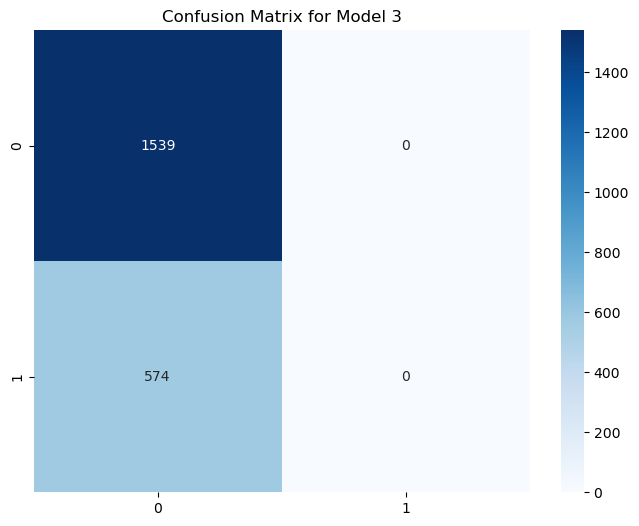

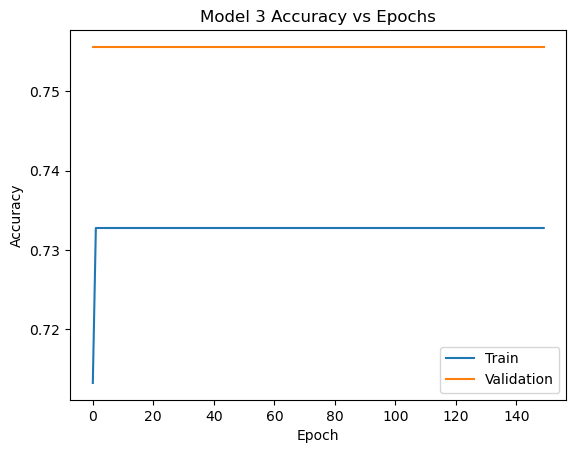

In [23]:
# Prepare feature columns and target column
X = df[['tenureMonths', 'MonthlyCharges', 'TotalCharges']]
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model3 = Sequential([
    Dense(12, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history3 = model3.fit(X_train, y_train, epochs=150, validation_split=0.2, verbose=1)

# Evaluate the model
loss3, accuracy3 = model3.evaluate(X_test, y_test)
print(f"Model 3 - Accuracy: {accuracy3}")

# Predict and build confusion matrix
y_pred3 = (model3.predict(X_test) > 0.5).astype("int32")
conf_matrix3 = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Model 3')
plt.show()

# Plot Accuracy vs Epochs
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model 3 Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()
